In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

DATA_PATH = "./data/"

In [2]:
data = pd.read_csv(DATA_PATH + "urbandict-word-defs.csv", error_bad_lines=False)
data = data.head(2500)
print(data.shape)

/var/folders/gq/xnxpqv5x7jz19nnym4s4_l940000gn/T/ipykernel_28892/749747967.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(DATA_PATH + "urbandict-word-defs.csv", error_bad_lines=False)
Skipping line 3692: expected 6 fields, saw 7
Skipping line 5546: expected 6 fields, saw 7
Skipping line 7198: expected 6 fields, saw 7
Skipping line 9758: expected 6 fields, saw 7
Skipping line 13350: expected 6 fields, saw 7
Skipping line 20000: expected 6 fields, saw 7
Skipping line 20088: expected 6 fields, saw 7
Skipping line 21776: expected 6 fields, saw 8
Skipping line 23826: expected 6 fields, saw 8
Skipping line 25255: expected 6 fields, saw 7
Skipping line 25643: expected 6 fields, saw 7
Skipping line 25777: expected 6 fields, saw 7
Skipping line 30965: expected 6 fields, saw 7
Skipping line 35485: expected 6 fields, saw 7
Skipping line 36022: expected 6 fields, saw 8
Skipping li

(2500, 6)


In [3]:
data.head(10)

,word_id,word,up_votes,down_votes,author,definition
0,7,Janky,296,255,dc397b2f,Undesirable; less-than optimum.
1,8,slumpin',16,37,dc397b2f,"low down and funky, but [knee deep] enough to ..."
2,9,yayeeyay,19,27,dc397b2f,"affirmation; suggestion of encouragement, appr..."
3,12,hard-core,162,96,d1610749,anything out of our league that can be good or...
4,13,brutal,12,45,40ece1ef,anything that makes you sweat
5,14,skanky,9,48,485e4db7,"Anything of or pertaining to a $10,000 hooker."
6,15,ho-bag,26,27,b37fba05,"a term of endearment, used affectionately for ..."
7,16,massive,36,45,b9dcf126,really really good. excellently good.
8,17,wtf,183,99,a6c97ba3,what the fuck? ;; use it in place of expletive...
9,19,Hazy,272,184,49bc960d,A guys state of mind after he sees the girl of...


In [24]:
target_data = data['word'].tolist()
target_data = [str(x) for x in target_data]

train, test = train_test_split(target_data, test_size=0.05, random_state=42)
print(f"""train: {len(train)}, test: {len(test)}""")

train: 2375, test: 125


In [25]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(train)
print(f"TF-IDF Matrix Shape: {tfidf_matrix.shape}")

TF-IDF Matrix Shape: (2375, 2164)


In [26]:
tfidf_argmax = np.argmax(tfidf_matrix.toarray(), axis=1)
print(tfidf_argmax.shape)

(2375,)


In [27]:
tfidf_argmax

array([ 835, 1670, 1713, ...,   90, 1638, 1792])

In [28]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

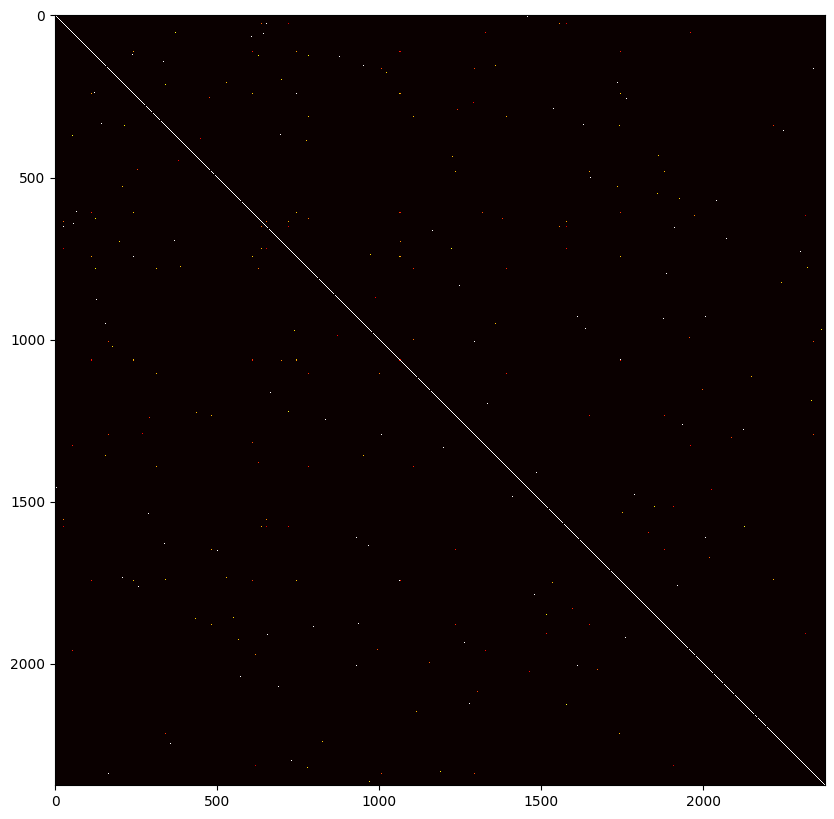

In [29]:
plt.figure(figsize=(10, 10))
plt.imshow(cosine_sim, cmap='hot', interpolation='nearest')
plt.show()

In [30]:
title_to_index = dict(zip(train, range(len(train))))

idx = title_to_index['skanky']
print(idx)

2258


In [35]:
random_select_word = random.choice(list(train))
print(random_select_word)

fag


In [36]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = title_to_index[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return [train[i] for i in movie_indices]

get_recommendations(random_select_word)

['fag hag',
 'green',
 'sheist/ sheisty',
 'Sizzum',
 'bitch face',
 'Reach Around',
 'dig it',
 'net',
 'bird',
 'dell holiday n00b']